In [1]:
import tweepy

In [2]:
import config

In [91]:
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
tweets = api.search("#covid19", count=100)
for tweet in tweets:
    print(tweet.text)

Misguided ‘patriotism’ is killing this country.

#Covid19 https://t.co/Bfizibg622
RT @eaglewarrior427: #Georgia has had 425K #COVID19  cases &amp; almost 9K deaths

It didn't have to be this way.

Both Perdue &amp; Loeffler were…
RT @axidentaliberal: @KLoeffler has attacked @ReverendWarnock 
She smeared him
She's gone as low as you can go

But after she tests positiv…
RT @NCDCgov: DID YOU KNOW?

The virus that causes #COVID19 can live on surfaces for several hours

⚫Limit or avoid sharing personal items
⚫…
RT @bianet_org: #biamag Dr. Özgür Bilek, #Covid19'un iş kazası ya da meslek hastalığı olarak kabul edilmemesinin ne anlama geldiğini anlatt…
RT @HelenBranswell: This ⁦@rkhamsi⁩ piece makes a lot of sense to me. Health workers are being traumatized by a relentless flow of #COVID19…
@MoriartyLab BC refuses to regularly test #covid19 LTCH workers for Covid19. 

Only does screening question which m… https://t.co/QLGGQYoHTb
RT @WybrenvanHaga: Technische vragen waarom in de richtlijn van h

In [4]:
ids = api.followers_ids(screen_name="TheWeeknd", count=10)
for user in api.lookup_users(user_ids=ids):
    print("https://twitter.com/{}".format(user.screen_name))


https://twitter.com/ale48005530
https://twitter.com/Alavto2404
https://twitter.com/Lexcxo2
https://twitter.com/FridgetP
https://twitter.com/vashon64343900
https://twitter.com/ArsiyaMujawar
https://twitter.com/PajulaErik
https://twitter.com/itscareybaby_
https://twitter.com/Michele92498812
https://twitter.com/MacyOBrien18


In [5]:
#Reminder to get current user mention(for us we can use brand's name in this)
tweets_mentions = api.mentions_timeline(count=10)
for tweet in tweets_mentions:
    print(tweet.text)

In [6]:
#Oh God no one mentions me hahahhaah

In [7]:
#lets analyze 


In [8]:
my_timeline = api.home_timeline(count=10)
type(my_timeline)

tweepy.models.ResultSet

In [9]:
help(my_timeline)

Help on ResultSet in module tweepy.models object:

class ResultSet(builtins.list)
 |  ResultSet(max_id=None, since_id=None)
 |  
 |  A list like object that holds results from a Twitter API query.
 |  
 |  Method resolution order:
 |      ResultSet
 |      builtins.list
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, max_id=None, since_id=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ids(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  max_id
 |  
 |  since_id
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from builtins.list:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Retu

In [10]:
dir(my_timeline)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_max_id',
 '_since_id',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'ids',
 'index',
 'insert',
 'max_id',
 'pop',
 'remove',
 'reverse',
 'since_id',
 'sort']

In [11]:
my_timeline.__dict__

{'_max_id': None, '_since_id': None}

In [12]:
type(my_timeline)

tweepy.models.ResultSet

In [13]:
one = my_timeline[0]

In [14]:
attributes = one._json.items()
attr_type = [type(x) for x in attributes]

In [15]:
#now lets use each attribute one by one

In [16]:
one.created_at # return a date time object

datetime.datetime(2020, 11, 22, 5, 50, 30)

In [17]:
one.id # return id of the tweet we don't need it that much

1330388164242857985

In [18]:
one.id_str # string version of id 

'1330388164242857985'

In [19]:
one.text # return the actual tweet which is very useful

'@TwitterU @back_to_Matheus 😂 https://t.co/dvh0JUWegX'

In [20]:
one.truncated # return whether the tweet is truncated version or not

False

In [21]:
one.entities.keys()

dict_keys(['hashtags', 'symbols', 'user_mentions', 'urls', 'media'])

In [22]:
one.entities['hashtags']

[]

In [23]:
#here is better way to get hashtags 
for elt in one.entities['hashtags']:
    print(elt['text'])

In [24]:
one.entities['symbols'] # IDK what the hell this returns 

[]

In [25]:
one.entities['user_mentions'] # list of mentioned users 

[{'screen_name': 'TwitterU',
  'name': 'TwitterU is @ #Codechella 🎡',
  'id': 172442947,
  'id_str': '172442947',
  'indices': [0, 9]},
 {'screen_name': 'back_to_Matheus',
  'name': 'Matheus Power',
  'id': 1648061395,
  'id_str': '1648061395',
  'indices': [10, 26]}]

In [26]:
for elt in one.entities['user_mentions']:
    print(elt['screen_name'])
    print(elt['name'])
    print(elt['id'])
    print(elt['id_str'])

#we need the id of mentioned user to know about the user more using id search

TwitterU
TwitterU is @ #Codechella 🎡
172442947
172442947
back_to_Matheus
Matheus Power
1648061395
1648061395


In [27]:
one.entities['urls'] #returns list of urls in tweets

[]

In [28]:
one.source #this might be very useful since it returns user's platform

'Twitter for iPhone'

In [29]:
one.in_reply_to_status_id

1330372301473234944

In [30]:
one.in_reply_to_status_id_str

'1330372301473234944'

In [31]:
one.in_reply_to_user_id

172442947

In [32]:
one.in_reply_to_user_id_str

'172442947'

In [33]:
one.in_reply_to_screen_name

'TwitterU'

In [34]:
one.user 

User(_api=<tweepy.api.API object at 0x7f0051b7afd0>, _json={'id': 289483672, 'id_str': '289483672', 'name': 'Kelly 🎡 is at #Codechella', 'screen_name': 'Hummmmmbaby', 'location': '', 'description': "in search of the world's best b⚫️ba milk tea. bay area sports in my blood. @twitteru university recruiting hYPe 🤪 @TwitterAsians lead ❤️", 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 2597, 'friends_count': 986, 'listed_count': 29, 'created_at': 'Thu Apr 28 18:40:00 +0000 2011', 'favourites_count': 26650, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 6223, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'BADFCD', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme12/bg.gif', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme12/bg.gif', 'profile_background_tile

In [35]:
one._json.keys()


dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [36]:
one.geo #return geographic location if available else return None

In [37]:
one.coordinates   #return latitude longtiude coordinate if available else return None

In [38]:
one.place # return place if available else return None

Place(_api=<tweepy.api.API object at 0x7f0051b7afd0>, id='c47c0bc571bf5427', url='https://api.twitter.com/1.1/geo/id/c47c0bc571bf5427.json', place_type='city', name='Honolulu', full_name='Honolulu, HI', country_code='US', country='United States', contained_within=[], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x7f0051b7afd0>, type='Polygon', coordinates=[[[-157.950476, 21.254837], [-157.648702, 21.254837], [-157.648702, 21.38505], [-157.950476, 21.38505]]]), attributes={})

In [39]:
one.contributors

In [40]:
one.is_quote_status

False

In [41]:
one.retweet_count

0

In [42]:
one.favorite_count

0

In [43]:
one.favorited

False

In [44]:
one.retweeted

False

In [45]:
one.lang

'und'


# lets do some more fun

In [46]:
api

In [47]:
dir(api)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_list_members',
 '_lookup_friendships',
 '_pack_image',
 '_remove_list_members',
 '_send_direct_message',
 'add_list_member',
 'add_list_members',
 'api_root',
 'auth',
 'blocks',
 'blocks_ids',
 'cache',
 'cached_result',
 'compression',
 'configuration',
 'create_block',
 'create_favorite',
 'create_friendship',
 'create_list',
 'create_media_metadata',
 'create_mute',
 'create_saved_search',
 'destroy_block',
 'destroy_direct_message',
 'destroy_favorite',
 'destroy_friendship',
 'destroy_list',
 'destroy_mute',
 'destroy_saved_search',
 'destroy_status',
 'favorites',
 'followers',
 'followers_ids',
 'friends',
 

In [48]:
name_of = one.user.screen_name
user = api.get_user(name_of)

In [49]:
user._json.keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'profile_location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [50]:
user.screen_name

'Hummmmmbaby'

In [51]:
user.name

'Kelly 🎡 is at #Codechella'

In [52]:
user.followers_count

2597

In [53]:
for frnd in user.friends():
    print(frnd.screen_name)

_TeNgaio_
linukxxx
AlongeEfe
joycew67
Transition46
DrBiden
ChrisCuomo
staceyabrams
mPinoe
oumeimin
angadsg
shoher
theYariBlanco
dbarrett
oxMrMIKExo
normant_
mjmichellekim
bbnoodz
Kingzac21
fauciforthewin


In [54]:
user.followers

<bound method User.followers of User(_api=<tweepy.api.API object at 0x7f0051b7afd0>, _json={'id': 289483672, 'id_str': '289483672', 'name': 'Kelly 🎡 is at #Codechella', 'screen_name': 'Hummmmmbaby', 'location': '', 'profile_location': None, 'description': "in search of the world's best b⚫️ba milk tea. bay area sports in my blood. @twitteru university recruiting hYPe 🤪 @TwitterAsians lead ❤️", 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 2597, 'friends_count': 986, 'listed_count': 29, 'created_at': 'Thu Apr 28 18:40:00 +0000 2011', 'favourites_count': 26650, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 6223, 'lang': None, 'status': {'created_at': 'Sun Nov 22 05:50:30 +0000 2020', 'id': 1330388164242857985, 'id_str': '1330388164242857985', 'text': '@TwitterU @back_to_Matheus 😂 https://t.co/dvh0JUWegX', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'sc

# Word cloud
    A graphical display of words in a corpus 
    size of word based on number of occurrences. the more the occurrences the bigger the size and vise versa
    visual view of the most popular terms

In [55]:
#lets get Donald J Trump's tweets

In [56]:
trump = api.get_user('realDonaldTrump')
trump_name = trump.screen_name

In [57]:
trump_tweets = api.user_timeline(screen_name=trump_name, count=200,  include_rts = False, tweet_mode = 'extended')

In [58]:
len(trump_tweets)


132

In [59]:
tweet = trump_tweets[0]

In [60]:
tweet

Status(_api=<tweepy.api.API object at 0x7f0051b7afd0>, _json={'created_at': 'Sun Nov 22 04:55:16 +0000 2020', 'id': 1330374263581368320, 'id_str': '1330374263581368320', 'full_text': '....WILL APPEAL!', 'truncated': False, 'display_text_range': [0, 16], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1330374020613758977, 'in_reply_to_status_id_str': '1330374020613758977', 'in_reply_to_user_id': 25073877, 'in_reply_to_user_id_str': '25073877', 'in_reply_to_screen_name': 'realDonaldTrump', 'user': {'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'description': '45th President of the United States of America🇺🇸', 'url': 'https://t.co/8f9VFxztEJ', 'entities': {'url': {'urls': [{'url': 'https://t.co/8f9VFxztEJ', 'expanded_url': 'http://Vote.DonaldJTrump.com', 'dis

In [61]:
for i in range(10):
    tweet = trump_tweets[i]
    print(tweet.full_text)
    print(tweet.created_at)
    print('\n')

....WILL APPEAL!
2020-11-22 04:55:16


Thanks Mark. It’s all a continuation of the never ending Witch Hunt. Judge Brann, who would not even allow us to present our case or evidence, is a product of Senator Pat “No Tariffs” Toomey of Pennsylvania, no friend of mine, &amp; Obama - No wonder. 900,000 Fraudulent Votes! https://t.co/17rk2KsUPs
2020-11-22 04:54:18


“Dominion-izing the Vote”
Part Three via @OANN @ChanelRion https://t.co/5En1SjPIol
2020-11-22 04:32:09


“Dominion-izing the Vote”
Part Two via @OANN @ChanelRion 
https://t.co/HFvrnViseu
2020-11-22 04:31:12


“Dominion-izing the Vote”
Part One via @OANN @ChanelRion 
https://t.co/7OtrKfoj6q
2020-11-22 04:30:20


True! https://t.co/tlb3zylLqX
2020-11-22 04:23:48


They never thought a Vaccine could be done so soon but don’t worry, they will try to give the credit to Biden! https://t.co/zp7vZET8R4
2020-11-22 04:15:42


https://t.co/3XrEnnwhMn
2020-11-22 03:26:01


https://t.co/dHIHuBOqqY
2020-11-22 03:25:42


Sorry Liz, can’t accept

In [62]:
!pip install wordcloud

In [63]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
trump_tweets_text = str([tweet.full_text for tweet in trump_tweets])
word_cloud = WordCloud(stopwords=stopwords, max_words=25, \
                      background_color="white").generate(trump_tweets_text)

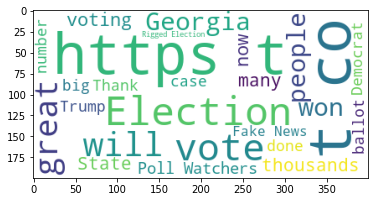

In [64]:
import matplotlib.pyplot as plt
plt.imshow(word_cloud)

In [87]:
# as we can see there are some words needs to be ignored lets do that
stopwords.update(['https', 't', 'co', 'many'])
word_cloud = WordCloud(stopwords=stopwords, max_words=10, \
                      background_color="azure").generate(trump_tweets_text)
list(word_cloud.words_.keys())[0]

'Election'

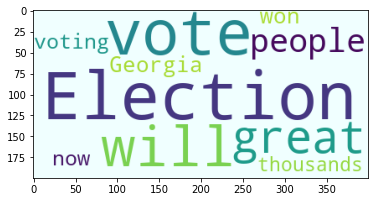

In [66]:
plt.imshow(word_cloud)

# Sentiment Analysis
    identify and categorize intent or opinion in text data 
    ==>in sentiment analysis we want to determine sentence's polarity ranging from -1 to 1 
    +1(postive)
    -1(negative)
     0(neutral)
    ==> we also want to understand whether the sentiment is objective or subjective
     0(objective)
    +1(subjective)

In [67]:
# to implement sentiment analysis we can use the bag of words technique

In [68]:
!pip install textblob

In [69]:
from textblob import TextBlob

In [70]:
trump_tweets_list = [tweet.full_text for tweet in trump_tweets]
print('{:40}:{:10}:{:10}'.format('Review', 'Polarity', 'Subjectivity'))
for tweet in trump_tweets_list:
    sentiment = TextBlob(tweet)
    print('{:40} :   {: 01.2f}   :   {:01.2f}'.format(tweet[:40]\
                                                     ,sentiment.polarity, sentiment.subjectivity))

Review                                  :Polarity  :Subjectivity
....WILL APPEAL!                         :    0.00   :   0.00
Thanks Mark. It’s all a continuation of  :    0.10   :   0.10
“Dominion-izing the Vote”
Part Three via :    0.00   :   0.00
“Dominion-izing the Vote”
Part Two via @ :    0.00   :   0.00
“Dominion-izing the Vote”
Part One via @ :    0.00   :   0.00
True! https://t.co/tlb3zylLqX            :    0.44   :   0.65
They never thought a Vaccine could be do :    0.00   :   0.00
https://t.co/3XrEnnwhMn                  :    0.00   :   0.00
https://t.co/dHIHuBOqqY                  :    0.00   :   0.00
Sorry Liz, can’t accept the results of a :   -0.13   :   0.65
Well, there were hundreds of thousands o :   -0.38   :   0.70
This is not at all frivolous. It is brou :   -0.04   :   0.58
....the COURAGE to do what has to be don :    0.00   :   0.00
Why is Joe Biden so quickly forming a Ca :    0.22   :   0.47
The Media is just as corrupt as the Elec :   -0.62   :   1.00
Fake 

In [71]:
# Summerizing sentiment data

Final summarized counts :  [79, 28, 25]
Pie Presentation 
 ----------------------


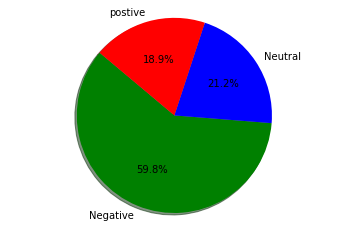

In [72]:
labels = ['Negative', 'Neutral', 'postive']
values = [0, 0, 0] #initializing count array
for tweet in trump_tweets_list:
    sentiment = TextBlob(tweet)
    polarity = round((sentiment.polarity +1) *3) %3
    values[polarity] = values[polarity] + 1
print("Final summarized counts : ", values)
colors = ['Green', 'Blue', 'Red']
print("Pie Presentation \n ----------------------")
plt.pie(values, labels=labels, colors=colors, 
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# Clustering
    -unsupervised machine learning technique
    -group similar items together based on features
    -in text analysis the feature could be a single word
    -documents with similar words group together
    -clustering algorithms only use numeric data, so our text should converted to numeric representation
    -we can use TF_IDF(Text frequence in document frequencey) technique to represent our text data into numeric
    -group documents by similarity

In [73]:
#what we do here is to get tweets from trump and peoples he follows then use clustering algorithm to understand
#what kind of ideas revolve around on those group

In [94]:
#for now lets get 20 people that trump follows
trump_follows = []
ids = api.followers_ids(screen_name=trump_name, wait_on_rate_limit=True)
for user in api.lookup_users(user_ids=ids):
    trump_follows.append(user.screen_name)
len(trump_follows)

TweepError: Twitter error response: status code = 400

In [75]:
#for each person lets get their 50 tweets it would be naive implementation
all_tweets = []
def get_tweets(name):
    user = api.get_user(name)
    name = user.screen_name
    tweets = api.user_timeline(screen_name=name, count=3, include_rts=False,tweet_mode='extended')
    return tweets
a = get_tweets(trump_follows[0])
for name in trump_follows:
    try:
        tweets = get_tweets(name)
    except Exception as exp:
        continue
    tweets = tweets
    all_tweets.extend(tweets)

In [76]:
all_tweets

[Status(_api=<tweepy.api.API object at 0x7f0051b7afd0>, _json={'created_at': 'Mon Nov 16 08:51:22 +0000 2020', 'id': 1328259353791655936, 'id_str': '1328259353791655936', 'full_text': 'מי אמר?\n\n"סיפור הקיבוצים רב הוד וקשור בסיפור המדינה בהתיישבות, בביטחון, ביצירה, בעשייה גשמית ורוחנית כאחד. אנשי הקיבוצים נאחזו בקרקע, עבדו את האדמה עם הנץ החמה ונרתמו להגנתה עם שקיעת השמש. יש לנו חוב עצום למוסד הזה" \n\nרמז: לבן שלו הוא שכח לספר את זה', 'truncated': False, 'display_text_range': [0, 249], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1151064639515582464, 'id_str': '1151064639515582464', 'name': 'אבשלום וילן', 'screen_name': 'avshalomvilan', 'location': '', 'description': 'מזכ״ל התאחדות 

In [77]:
#lets create sample tweet categories
categories = ['poltics', 'movies', 'education', 'entertainment']

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [79]:
all_tweets_text = [tweet.full_text for tweet in all_tweets]
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(all_tweets_text)
count_vect.vocabulary_.get(u'https')


66

In [80]:
#lets use kmeans clustering

In [81]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
X_train_tf = tf_transformer.transform(X_train)
X_train_tf.shape

(20, 259)

In [82]:
vectorizer = TfidfVectorizer(stop_words='english')
hash_matrix = vectorizer.fit_transform(all_tweets_text)
categories = vectorizer.get_feature_names()
categories

['11',
 '5n6irsxpk4',
 '99',
 'aa',
 'abelles',
 'accept',
 'access',
 'ai',
 'aj_sabadell',
 'albert_rivera',
 'amelanovela',
 'amp',
 'année',
 'appreciate',
 'arrived',
 'ashokgehlot51',
 'asiatiques',
 'best',
 'boite',
 'bomb',
 'bonjour',
 'browns',
 'campaigner',
 'cares',
 'center',
 'champ',
 'chapels',
 'closing',
 'cmpunk',
 'contacte',
 'core',
 'coño',
 'criticism',
 'cross',
 'cuela',
 'currar',
 'd6hy8ndjkz',
 'dividir',
 'dono',
 'durant',
 'durée',
 'eduh6qpk4w',
 'el',
 'engagement',
 'envieu',
 'et',
 'eyes',
 'fascinating',
 'fedora',
 'ffrh9npeg1',
 'fineasssvirgo',
 'fresh',
 'hai',
 'heyman',
 'https',
 'il',
 'intento',
 'internet',
 'intéressé',
 'je',
 'kaboo',
 'kde',
 'keir_starmer',
 'la',
 'lag',
 'lage',
 'le',
 'learn',
 'legs',
 'lifetime',
 'like',
 'long',
 'machine',
 'matters',
 'mbwkst8jbq',
 'meu',
 'millionaires',
 'mobile',
 'money',
 'narcos',
 'nuzunrr7pe',
 'par',
 'paul',
 'pena',
 'penso',
 'perilloses',
 'pipe',
 'point',
 'ponte',
 'pour'

In [83]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=4).fit(hash_matrix)

In [84]:
clusters = Kmeans.labels_
for group in set(clusters):
    print('\n Group : ', group, '\n--------------')
    for i in range(4):
        if(clusters[i] == group):
            print(categories[i])


 Group :  0 
--------------

 Group :  1 
--------------
11
5n6irsxpk4
99
aa

 Group :  2 
--------------

 Group :  3 
--------------


# #Fixme we need to preprocess the data to clean it first 

Sum of squared distances :  [18.664805359964003, 16.73867262218223, 15.4150222717788, 14.261115550633871, 13.232871392052001, 12.141697533422473, 11.18774348842655, 10.278447928213053, 9.164491779303255, 8.161785136395963, 7.164491779303255, 6.1644917793032565, 5.138990890515178, 4.161785136395963]


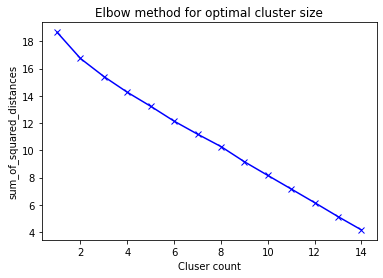

In [85]:
#finding optimal clusters
sosd = [] #sum of squared distances
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k).fit(hash_matrix)
    sosd.append(km.inertia_)
print("Sum of squared distances : ", sosd)
plt.plot(K, sosd, 'bx-')
plt.xlabel('Cluser count')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal cluster size')
plt.show()